# Section II: Checking Conversion Rates

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [37]:
df = pd.read_csv("conversion_rates.csv")

In [38]:
df.describe()

,male,age,has_insurance,reached_end
count,280.000000,280.000000,280.000000,280.000000
mean,0.500000,33.271429,0.539286,0.464286
std,0.500895,2.566235,0.499347,0.499616
min,0.000000,29.000000,0.000000,0.000000
25%,0.000000,31.000000,0.000000,0.000000
50%,0.500000,33.000000,1.000000,0.000000
75%,1.000000,35.000000,1.000000,1.000000
max,1.000000,39.000000,1.000000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
date             280 non-null object
male             280 non-null int64
age              280 non-null int64
has_insurance    280 non-null int64
came_from        280 non-null object
reached_end      280 non-null int64
dtypes: int64(4), object(2)
memory usage: 13.2+ KB


In [40]:
#df = df_.loc[df['age'] <= 36]

In [41]:
#df.describe()

In [42]:
# Sorting data in ascending order
df = df.sort_values(['date'])

In [43]:
df.head()

,date,male,age,has_insurance,came_from,reached_end
200,2018-09-02,1,35,1,Insurance Site C,1
199,2018-09-02,1,29,1,Google Search,0
198,2018-09-02,0,32,1,Google Search,0
197,2018-09-02,1,32,0,Google Search,1
104,2018-09-02,1,36,1,Insurance Site C,0


In [44]:
#dataframe after 2018-09-05
df2 = df[(df['date'] > "2018-09-04")]
#dataframe before 2018-09-05
df1 = df[(df['date'] <= "2018-09-04")]

In [45]:
#list of conversion_rate before 2018-09-05
df1_num_con = list(df1.groupby("reached_end")['age'].count())
#list of conversion_rate after 2018-09-05
df2_num_con = list(df2.groupby("reached_end")['age'].count())
# mean of conversion rate before 2018-09-05
df1_mean = df1['reached_end'].mean()
# mean of conversion rate after 2018-09-05
df2_mean = df2['reached_end'].mean()
# standard deviation of conversion rate after 2018-09-05
df1_std = df1['reached_end'].std()
# standard deviation of conversion rate before 2018-09-05
df2_std = df2['reached_end'].std()

In [46]:
df1_mean, df2_mean

(0.3383458646616541, 0.5782312925170068)

As we can already see from the mean of both the samples, sample 2 (after product change date) has a higher mean of conversion than sample 1 (before product change)

We should do a 2 sample Hypothesis test to check for the same <br>

**Ho** = Product change did not improve the conversion rate <br>
**Ha** = Product change did improve the conversion rate <br>
**alpha** (significance level) = 0.05

Now let's do a 2 sample Z test on our samples<br>
And the formula is:
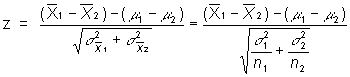

In [47]:
# Function for calculating the Z and p-value
def two_sam_Z(X1, X2, mudiff, sd1, sd2, n1, n2):
    
    pooledSE = np.sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = (1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 5)

In [48]:
two_sam_Z(df1_mean, df2_mean, 0, df1_std, df2_std, sum(df1_num_con), sum(df2_num_con))

(-4.134, 2e-05)

**As we can see p-value is 0.00002, which is << our significance level so we reject the null hypothesis. <br>
',' There is a 0.002% chance that the product change did not improve the conversion rate. <br>
So we should go ahead with the product improvement!**